In [1]:
import torch
import numpy as np
import joblib
import matplotlib.pyplot as plt
import glob
import umap
from natsort import natsorted

plt.style.use("bmh")

/home/bgamboa/anaconda3/envs/dino/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokens_path = glob.glob("./outputs/tokens*")
labels_path = glob.glob("./outputs/trues*")
tokens_path = natsorted(tokens_path)
labels_path = natsorted(labels_path)

In [3]:
class_mapper = {
    "0": "0",
    "1": "1+",
    "2": "2+",
    "3": "3+",
}

In [4]:
tokens_dict = {}
labels_dict = {}
for i, (tp, lp) in enumerate(zip(tokens_path, labels_path)):
    tokens = joblib.load(tp)
    labels = joblib.load(lp)
    embedding = umap.UMAP(
        n_neighbors=10, min_dist=0.05, metric="correlation"
    ).fit_transform(tokens)

    tokens_dict[str(i)] = embedding
    labels_dict[str(i)] = labels

Text(0.5, 0.98, 'K-MEANS CLUSTERING SOLUTION (VALIDATION)\nDIMENSIONALITY REDUCTION WITH UMAP OVER TOKEN CLASSIFICATION (dimx192)')

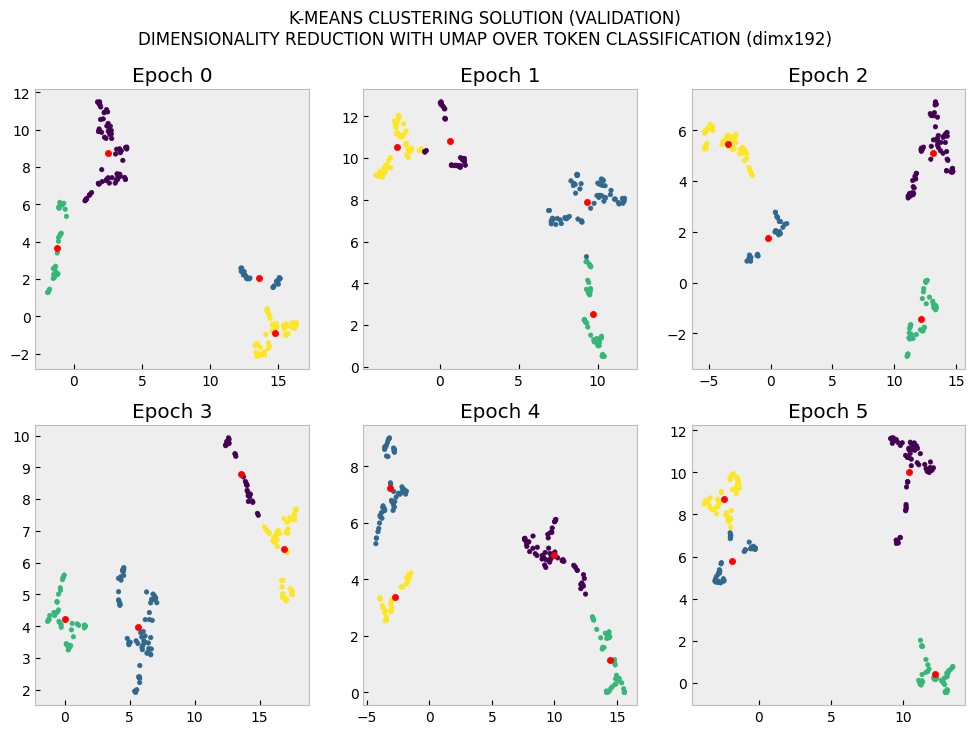

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import BisectingKMeans, KMeans
from sklearn.datasets import make_blobs

n_clusters = 4
random_state = 0
cnt = 0
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i in range(2):
    for j in range(3):
        try:
            X = tokens_dict[str(cnt)]
            algo = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=3)
            algo.fit(X)
            centers = algo.cluster_centers_
            axes[i, j].scatter(X[:, 0], X[:, 1], s=10, c=algo.labels_)
            axes[i, j].scatter(centers[:, 0], centers[:, 1], c="r", s=20)
            axes[i, j].set_title(f"Epoch {cnt}")
            axes[i, j].grid(False)
        except:
            pass
        cnt += 1


fig.suptitle(
    "K-MEANS CLUSTERING SOLUTION (VALIDATION)\nDIMENSIONALITY REDUCTION WITH UMAP OVER TOKEN CLASSIFICATION (dimx192)"
)

Text(0.5, 0.98, 'CLUSTERING SOLUTION (VALIDATION)\nDIMENSIONALITY REDUCTION WITH UMAP OVER TOKEN CLASSIFICATION (dimx192)')

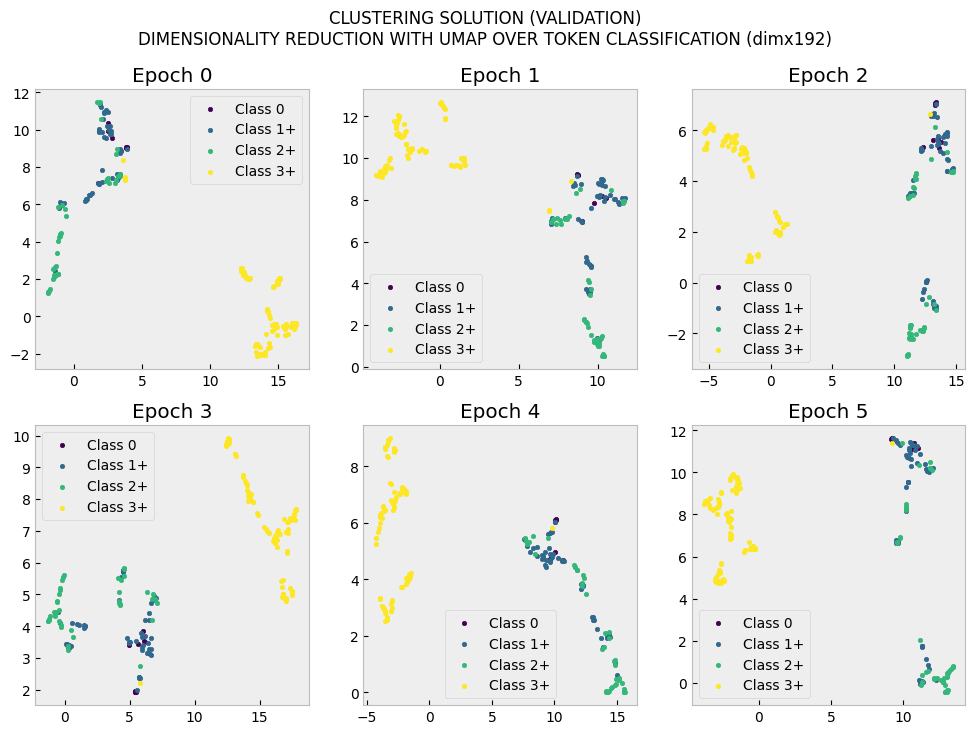

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
cnt = 0
for i in range(2):
    for j in range(3):
        try:
            X = tokens_dict[str(cnt)]
            Y = labels_dict[str(cnt)]
            classes = np.unique(Y)
            colors_arr = np.linspace(0, 1, len(classes), endpoint=True)
            colors_cod = plt.cm.viridis(colors_arr)
            for c, colors in zip(classes, colors_cod):
                indexes = np.where(Y == c)[0]
                axes[i, j].scatter(
                    X[indexes, 0],
                    X[indexes, 1],
                    s=10,
                    color=colors,
                    label=f"Class {class_mapper[str(c)]}",
                )
                axes[i, j].set_title(f"Epoch {cnt}")
                axes[i, j].grid(False)
                axes[i, j].legend()

        except:
            pass

        cnt += 1
fig.suptitle(
    "CLUSTERING SOLUTION (VALIDATION)\nDIMENSIONALITY REDUCTION WITH UMAP OVER TOKEN CLASSIFICATION (dimx192)"
)